Librerías

In [0]:
pip install librosa --upgrade

     |████████████████████████████████| 1.6MB 3.4MB/s 
  Created wheel for librosa: filename=librosa-0.7.2-cp36-none-any.whl size=1612885 sha256=a750b42c383087f89befb856702497d120c83f228dfa2bafc7b7641a6f4214ca
  Stored in directory: /root/.cache/pip/wheels/4c/6e/d7/bb93911540d2d1e44d690a1561871e5b6af82b69e80938abef
Successfully built librosa
  Found existing installation: librosa 0.6.3
    Uninstalling librosa-0.6.3:
      Successfully uninstalled librosa-0.6.3


In [0]:
from scipy.io.wavfile import write, read
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft
from IPython.display import Audio
import scipy.signal
from scipy.signal import lfilter, hamming
import librosa
import pandas as pd

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import set_with_dataframe

Captura de audios para base de datos

In [0]:
fonema=['A','B','THETA','CH','D','E','F','G','I','J','K','L','LL','M','N','Ñ','O','P','R','RR','S','T','U','KS','Y']
header=['FONEMA',	'EDAD',	'GENERO',	'ID',	'FORMANTE 1',	'FORMANTE 2',	'FORMANTE 3',	'FORMANTE 4','FORMANTE 5','FORMANTE 6','FORMANTE 7']
gen=['H','M']
edad=['N','P','A']

sheet=gc.open_by_url('https://docs.google.com/spreadsheets/d/1r_nu3vtCngaU2RCSibHOx3r0alogaUriaAKh9fY1-Rg/edit#gid=0').sheet1

In [0]:
#prueba=pd.DataFrame(abc)
#set_with_dataframe(sheet,prueba)

In [0]:
rate, audio1Chan = read("A_A_H_26.wav")


rate, audio1Chan = read("A_A_H_3.wav")

oneChannelOnly(audio1Chan)

array([  0,   0,   0, ..., 119, 123, 127], dtype=int16)

In [0]:
def oneChannelOnly(file):
  try:
      res = file[:,1]
  except:
      res = file
  return np.array(res)

In [0]:
matrixOfFormant=[header]
for letter in fonema:
  for g in gen:
    for age in edad:
      for i in range(1,28):
        try:  
          text=letter+'_'+age+'_'+g+'_'+str(i)+'.wav'
          #try:
          rate, audio1Chan=read(text)
          audio1Chan=oneChannelOnly()
          N = len(audio1Chan)
          hamming = scipy.signal.hamming(N)
          file_H = audio1Chan * hamming
          res = lfilter([1],[1, 0.63],file_H)
          A = librosa.lpc(res, 16)
          raices = np.roots(A) #formantes!
          formantes=[]
          for k in raices:
            if(k.imag>0):
              w = np.arctan2(k.imag, k.real)
              Fk = w*(rate/(2*np.pi))
              Bw = (-1/2)*(rate/(2*np.pi))*np.log((k.real**2+k.imag**2)**(1/2))
              if(Fk>90 and Bw<450):
                formantes.append(Fk)

          resFormantes=[]
          resFormantes.append(letter) #Fonema
          resFormantes.append(age) #Edad
          resFormantes.append(g) #Genero
          resFormantes.append(i) #iD
          for k in np.round(np.sort(formantes),2): #Formantes en orden
            resFormantes.append(k)
        #Meterla en el csv

          matrixOfFormant.append(resFormantes)
        except:
          a = 1
          #print(text)
          #break;


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  if __name__ == '__main__':


In [0]:
matrixOfFormant=[header]
for letter in fonema:
  for g in gen:
    for age in edad:
      for i in range(1,28):
        try:  
          text=letter+'_'+age+'_'+g+'_'+str(i)+'.wav'
          #try:
          rate, audio1Chan=read(text)
          audio1Chan=oneChannelOnly()
          N = len(audio1Chan)
          hamming = scipy.signal.hamming(N)
          file_H = audio1Chan * hamming
          res = lfilter([1],[1, 0.63],file_H)
          A = librosa.lpc(res, 16)
          raices = np.roots(A) #formantes!
          formantes=[]
          for k in raices:
            if(k.imag>0):
              w = np.arctan2(k.imag, k.real)
              Fk = w*(rate/(2*np.pi))
              Bw = (-1/2)*(rate/(2*np.pi))*np.log((k.real**2+k.imag**2)**(1/2))
              if(Fk>90 and Bw<450):
                formantes.append(Fk)

          resFormantes=[]
          resFormantes.append(letter) #Fonema
          resFormantes.append(age) #Edad
          resFormantes.append(g) #Genero
          resFormantes.append(i) #iD
          for k in np.round(np.sort(formantes),2): #Formantes en orden
            resFormantes.append(k)
        #Meterla en el csv

          matrixOfFormant.append(resFormantes)
        except:
          a = 1
          #print(text)
          #break;


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  if __name__ == '__main__':


In [0]:
matrixOfFormant=[header]
for letter in fonema:
  for g in gen:
    for age in edad:
      for i in range(1,28):
        try:  
          text=letter+'_'+age+'_'+g+'_'+str(i)+'.wav'
          #try:
          rate, audio1Chan=read(text)
          audio1Chan=oneChannelOnly(audio1Chan)
          N = len(audio1Chan)
          hamming = scipy.signal.hamming(N)
          file_H = audio1Chan * hamming
          res = lfilter([1],[1, 0.63],file_H)
          A = librosa.lpc(res, 16)
          raices = np.roots(A) #formantes!
          formantes=[]
          for k in raices:
            if(k.imag>0):
              w = np.arctan2(k.imag, k.real)
              Fk = w*(rate/(2*np.pi))
              Bw = (-1/2)*(rate/(2*np.pi))*np.log((k.real**2+k.imag**2)**(1/2))
              if(Fk>90 and Bw<450):
                formantes.append(Fk)

          resFormantes=[]
          resFormantes.append(letter) #Fonema
          resFormantes.append(age) #Edad
          resFormantes.append(g) #Genero
          resFormantes.append(i) #iD
          for k in np.round(np.sort(formantes),2): #Formantes en orden
            resFormantes.append(k)
        #Meterla en el csv

          matrixOfFormant.append(resFormantes)
        except:
          a = 1
          #print(text)
          #break;


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  if __name__ == '__main__':


In [0]:
matrixOfFormant

[['FONEMA',
  'EDAD',
  'GENERO',
  'ID',
  'FORMANTE 1',
  'FORMANTE 2',
  'FORMANTE 3',
  'FORMANTE 4',
  'FORMANTE 5',
  'FORMANTE 6',
  'FORMANTE 7'],
 ['A', 'N', 'H', 13, 1075.82, 3218.89, 9230.95, 15249.05, 17124.11, 18888.05],
 ['A', 'N', 'H', 25, 10657.84],
 ['A', 'P', 'H', 20, 1506.68, 4591.98],
 ['A', 'P', 'H', 24, 1079.4, 4256.5, 8649.01, 10550.08],
 ['A', 'A', 'H', 3, 834.31, 3346.93, 6066.97, 13469.66, 16616.03, 20125.55],
 ['A', 'A', 'H', 4, 978.87, 4895.06, 7619.25],
 ['A', 'A', 'H', 5, 808.43, 2504.94, 6232.16, 13087.23, 16964.41],
 ['A', 'A', 'H', 7, 562.4, 5113.77],
 ['A', 'A', 'H', 15, 653.81, 10439.62, 14041.15, 16801.18, 19957.66],
 ['A', 'A', 'H', 17, 871.87, 2595.0, 7731.54],
 ['A', 'A', 'H', 18, 1016.32, 3789.35, 6483.82, 9300.83],
 ['A', 'A', 'H', 23, 1031.41, 10210.86],
 ['A', 'A', 'H', 26, 998.56, 3419.46, 5262.04, 9032.97, 10844.39],
 ['A', 'P', 'M', 2, 1223.81, 5641.17, 11485.88],
 ['A', 'P', 'M', 11, 691.66, 7163.52, 11032.64, 13311.49, 20627.12],
 ['A', '

In [0]:
prueba=pd.DataFrame(matrixOfFormant)
set_with_dataframe(sheet,prueba)

Creacion de base de datos con sus estadísticas

In [0]:
wb=gc.open_by_url('https://docs.google.com/spreadsheets/d/1r_nu3vtCngaU2RCSibHOx3r0alogaUriaAKh9fY1-Rg/edit#gid=0').sheet1
newDBHeader=['CODIGO','FORMANTE 1','FORMANTE 2','FORMANTE 3','FORMANTE 4','FORMANTE 5','FORMANTE 6','FORMANTE 7']
statisticDB=[newDBHeader]
data1=pd.DataFrame(wb.get_all_values())
new_header=data1.iloc[1]
data1=data1[2:]
data1.columns=new_header
data1

1,FONEMA,EDAD,GENERO,ID,FORMANTE 1,FORMANTE 2,FORMANTE 3,FORMANTE 4,FORMANTE 5,FORMANTE 6,FORMANTE 7,
2,A,N,H,13,1075.82,3218.89,9230.95,15249.05,17124.11,18888.05,0,0
3,A,N,H,25,0,0,0,0,0,0,0,0
4,A,P,H,20,1506.68,4591.98,0,0,0,0,0,0
5,A,P,H,24,1079.4,4256.5,8649.01,10550.08,0,0,0,
6,A,A,H,3,834.31,3346.93,6066.97,13469.66,16616.03,20125.55,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
613,Y,A,M,15,328.59,3629.63,5566.76,0,0,0,0,0
614,Y,A,M,16,369.95,2606.05,6913.13,0,0,0,0,0
615,Y,A,M,19,338.64,3026.74,6733.13,8890.06,22558.96,0,0,0
616,Y,A,M,21,308.45,9318.19,0,22318.71,0,0,0,0


In [0]:
statisticDB = []
for letter in fonema:
  for g in gen:
    for age in edad:
      dataAux=data1[((data1['FONEMA']==letter) &  (data1['EDAD']==age) & (data1['GENERO']==g))]
      #dataAux=data[(data['FONEMA']==letter)]
      dic={}
      for j in range(1,8):
        nums=np.array(dataAux['FORMANTE '+str(j)])
        res=[]
        for i in range(len(nums)):
          if(nums[i]!='0'):
            res.append(float(nums[i]))
        
        if(len(res)!=0):
          res=np.array(res)
          mean=np.mean(res)
          #std=np.std(res)
          #dic['FORMANTE '+str(j)]=[mean,std]
          dic['FORMANTE '+str(j)]=mean
        restuple=[]
        restuple.append(letter+'_'+age+'_'+g)
        #restuple.append(letter)
      for i in dic.values():
        restuple.append(i)

      statisticDB.append(restuple)

In [0]:
statisticDB

[['A_N_H', 1075.82, 3218.89, 9230.95, 15249.05, 17124.11, 18888.05],
 ['A_P_H', 1293.04, 4424.24, 8649.01, 10550.08],
 ['A_A_H',
  861.7755555555555,
  4484.421249999999,
  6565.963333333334,
  11222.6725,
  14808.276666666667,
  20125.55],
 ['A_N_M'],
 ['A_P_M',
  957.7349999999999,
  6402.345,
  11259.259999999998,
  13311.49,
  20627.12],
 ['A_A_M',
  900.298,
  3364.7630000000004,
  6385.253,
  10075.255555555554,
  13049.344000000001,
  19189.63,
  19203.47],
 ['B_N_H',
  407.16499999999996,
  5150.325000000001,
  9638.404999999999,
  11397.23,
  14042.28,
  19786.27],
 ['B_P_H', 338.24, 2301.61],
 ['B_A_H', 370.1, 2698.142, 5156.83, 10518.776000000002, 12860.343333333332],
 ['B_N_M'],
 ['B_P_M', 484.025, 3472.4700000000003, 14758.885, 15492.27],
 ['B_A_M',
  518.653,
  3615.273333333333,
  6394.466666666667,
  9746.82,
  17506.888333333332,
  18814.17],
 ['THETA_N_H', 4951.110000000001, 10343.125, 12267.735, 14126.985, 19047.76],
 ['THETA_P_H', 6161.69, 8374.84, 9838.18, 11101.14

In [0]:
statisticDB=pd.DataFrame(statisticDB)
statisticDB.columns=newDBHeader
statisticDB

,CODIGO,FORMANTE 1,FORMANTE 2,FORMANTE 3,FORMANTE 4,FORMANTE 5,FORMANTE 6,FORMANTE 7
0,A_N_H,1075.820000,3218.89000,9230.950000,15249.0500,17124.110000,18888.05,NaN
1,A_P_H,1293.040000,4424.24000,8649.010000,10550.0800,NaN,NaN,NaN
2,A_A_H,861.775556,4484.42125,6565.963333,11222.6725,14808.276667,20125.55,NaN
3,A_N_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A_P_M,957.735000,6402.34500,11259.260000,13311.4900,20627.120000,NaN,NaN
...,...,...,...,...,...,...,...,...
145,Y_P_H,5816.515000,7552.15000,NaN,NaN,NaN,NaN,NaN
146,Y_A_H,294.186667,4771.30750,7373.866000,9589.2720,15604.753333,22430.73,NaN
147,Y_N_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,Y_P_M,280.910000,3731.36500,6402.980000,11694.0850,17497.910000,19480.06,NaN


In [0]:
'''
for i in matrixFormantsSpectro:
  print("En la sección "+str(i[0]))
  contFormante=1
  dictRes={}
  for z in i[1]:
      #print('formante '+ str(contFormante))
      for j in range(1,len(statisticDB)):
        try:
          mean=statisticDB[j][contFormante][0]
          std=statisticDB[j][contFormante][1]
          if(z>=mean-std and z<=mean+std):
            #print('Posible en: '+statisticDB[j][0])
            try:
              dictRes[statisticDB[j][0]]=dictRes[statisticDB[j][0]]+(7-contFormante)
            except:
              dictRes[statisticDB[j][0]]=7-contFormante
        except:
          fallas=1      
      contFormante = contFormante + 1

  print(dictRes)
  
  if(len(dictRes)!=0):
    mejor=max(dictRes, key=dictRes.get)
    print(" ")
    print(mejor)
  print(" ")
  '''

'\nfor i in matrixFormantsSpectro:\n  print("En la sección "+str(i[0]))\n  contFormante=1\n  dictRes={}\n  for z in i[1]:\n      #print(\'formante \'+ str(contFormante))\n      for j in range(1,len(statisticDB)):\n        try:\n          mean=statisticDB[j][contFormante][0]\n          std=statisticDB[j][contFormante][1]\n          if(z>=mean-std and z<=mean+std):\n            #print(\'Posible en: \'+statisticDB[j][0])\n            try:\n              dictRes[statisticDB[j][0]]=dictRes[statisticDB[j][0]]+(7-contFormante)\n            except:\n              dictRes[statisticDB[j][0]]=7-contFormante\n        except:\n          fallas=1      \n      contFormante = contFormante + 1\n\n  print(dictRes)\n  \n  if(len(dictRes)!=0):\n    mejor=max(dictRes, key=dictRes.get)\n    print(" ")\n    print(mejor)\n  print(" ")\n  '

Código de ejecución


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """


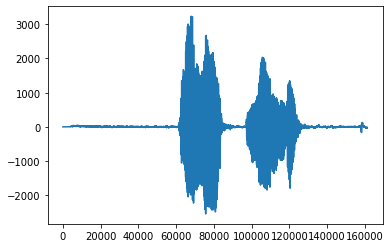

In [0]:
#Segundo intento: Espectrograma

audioPrueba='Hola_Mundo_M.wav'

rate,audio=read(audioPrueba)
try:
  audio=audio[:,1]
except:
    audio=audio
###################################
#Plot audio in time
#n = np.arange(lenaudio) 
plt.plot(audio)
###################################
muestras= 1024   # 21 ms


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


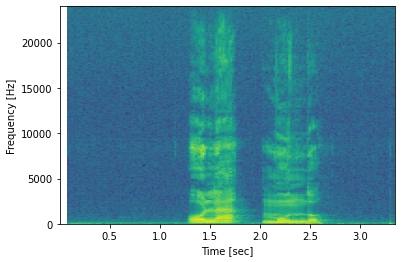

Vector que van a poblar nuestras frecuencias es de tamaño:
513
Número de ventanas:
179
Tenemos la siguiente cantidad de frecuencia
513


In [0]:
#######################################
#Spectrogram

#Preenfasis
audioFiltrado = lfilter([1],[1, 0.63],audio)

s, w, t, im=plt.specgram(audioFiltrado,Fs=rate,NFFT=muestras,window=scipy.signal.blackman(muestras))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

print("Vector que van a poblar nuestras frecuencias es de tamaño:")
print(len(s))
print("Número de ventanas:")
print(len(s[0]))
print("Tenemos la siguiente cantidad de frecuencia")
print(len(w))

In [0]:
i = 0
matrixFormantsSpectro=[]
for i in range(len(s[0])):
  try:
    valor = findFormantes(s[:,i])
    if(len(valor)>1):
      matrixFormantsSpectro.append([i,valor])
  except:
    a = 1

In [0]:
matrixFormantsSpectro

[[3, array([1013.37709611, 3114.37472572, 8993.25775158])],
 [47, array([2185.94612558, 4411.86967485, 6576.21803598])],
 [54, array([ 1081.30534585,  3257.03376097,  5285.35075889, 12506.16117017])],
 [61, array([  977.62817015,  3203.2290054 ,  5586.6175629 ,  7956.59416454,
         10223.04813815, 18210.00769697])],
 [68, array([13911.86677078, 22941.4551852 ])],
 [70, array([ 1592.04137779,  3983.55103238,  9852.41470517, 20422.93500414])],
 [71, array([ 6892.36282278, 12583.37725794, 14823.57274188, 16839.79264771,
         18615.297154  ])],
 [77, array([17597.23048412, 20183.56818087])],
 [83, array([ 1792.65379309, 11156.62289619, 14889.01416695])],
 [84, array([ 5610.75702072,  8463.98004763, 14706.62177162])],
 [85, array([ 5462.93274484,  8464.05907518, 14315.56954403])],
 [86, array([ 4646.9896452 ,  8839.53167796, 13917.51430467])],
 [87, array([ 4310.39514186,  8886.20239007, 13452.84123095])],
 [88, array([ 3994.00193985, 12950.82356169, 17407.60247051])],
 [89, array([

Uso de Kneighbours

In [0]:
#Base de datos generada
wb=gc.open_by_url('https://docs.google.com/spreadsheets/d/1r_nu3vtCngaU2RCSibHOx3r0alogaUriaAKh9fY1-Rg/edit#gid=0').sheet1
newDBHeader=['CODIGO','FORMANTE 1','FORMANTE 2','FORMANTE 3','FORMANTE 4','FORMANTE 5','FORMANTE 6','FORMANTE 7']
distance_columns=newDBHeader[1:4] 
data1=pd.DataFrame(wb.get_all_values())
new_header=data1.iloc[1]
data1=data1[2:]
data1.columns=new_header
data1

1,FONEMA,EDAD,GENERO,ID,FORMANTE 1,FORMANTE 2,FORMANTE 3,FORMANTE 4,FORMANTE 5,FORMANTE 6,FORMANTE 7,
2,A,N,H,13,1075.82,3218.89,9230.95,15249.05,17124.11,18888.05,0,0
3,A,N,H,25,0,0,0,0,0,0,0,0
4,A,P,H,20,0,0,0,0,0,0,0,0
5,A,P,H,24,1079.4,4256.5,8649.01,10550.08,0,0,0,
6,A,A,H,3,834.31,3346.93,6066.97,13469.66,16616.03,20125.55,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
613,Y,A,M,15,328.59,3629.63,5566.76,0,0,0,0,0
614,Y,A,M,16,369.95,2606.05,6913.13,0,0,0,0,0
615,Y,A,M,19,338.64,3026.74,6733.13,8890.06,22558.96,0,0,0
616,Y,A,M,21,308.45,9318.19,0,22318.71,0,0,0,0


In [0]:
wb=gc.open_by_url('https://docs.google.com/spreadsheets/d/1KGZJcvLskCMgPWkXqsr6ySL8ept5V4czYBRPqg46irU/edit?usp=drive_web&ouid=107092201184289528225').sheet1
newDBHeader=['CODIGO','FORMANTE 1','FORMANTE 2','FORMANTE 3','FORMANTE 4','FORMANTE 5','FORMANTE 6','FORMANTE 7']
#distance_columns=newDBHeader[1:4] 
dataVocals=pd.DataFrame(wb.get_all_values())
new_header=dataVocals.iloc[1]

dataVocals=dataVocals[2:]
dataVocals.columns=new_header
dataVocals

1,FONEMA,EDAD,GENERO,ID,FORMANTE 1,FORMANTE 2,FORMANTE 3,FORMANTE 4,FORMANTE 5,FORMANTE 6,FORMANTE 7,
2,A,N,H,13,1075.82,3218.89,9230.95,15249.05,17124.11,18888.05,0,0
3,A,N,H,25,0,0,0,0,0,0,0,0
4,A,P,H,20,0,0,0,0,0,0,0,0
5,A,P,H,24,1079.4,4256.5,8649.01,10550.08,0,0,0,
6,A,A,H,3,834.31,3346.93,6066.97,13469.66,16616.03,20125.55,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
122,U,A,M,15,352.58,4551.22,6624.52,0,0,0,0,0
123,U,A,M,16,356.91,5535.66,0,0,0,0,0,0
124,U,A,M,19,654.44,4847.91,6867.09,8193.56,0,0,0,0
125,U,A,M,21,590.75,4208.67,7737.79,22603.42,0,0,0,0


In [0]:
statisticDBVocals = []
for letter in ['A','E','I','O','U']:
  #for g in gen:
    #for age in edad:
      #dataAux=dataVocals[((dataVocals['FONEMA']==letter) &  (dataVocals['EDAD']==age) & (dataVocals['GENERO']==g))]
  dataAux=dataVocals[((dataVocals['FONEMA']==letter))]
  #dataAux=data[(data['FONEMA']==letter)]
  dic={}
  for j in range(1,8):
    nums=np.array(dataAux['FORMANTE '+str(j)])
    res=[]
    for i in range(len(nums)):
      if(nums[i]!='0'):
        res.append(float(nums[i]))
    
    if(len(res)!=0):
      res=np.array(res)
      mean=np.mean(res)
      #std=np.std(res)
      #dic['FORMANTE '+str(j)]=[mean,std]
      dic['FORMANTE '+str(j)]=mean
    restuple=[]
    #restuple.append(letter+'_'+age+'_'+g)
    restuple.append(letter)
    #restuple.append(letter)
  for i in dic.values():
    restuple.append(i)

  statisticDBVocals.append(restuple)

In [0]:
statisticDBVocals=pd.DataFrame(statisticDBVocals)
statisticDBVocals.columns=newDBHeader
statisticDBVocals

,CODIGO,FORMANTE 1,FORMANTE 2,FORMANTE 3,FORMANTE 4,FORMANTE 5,FORMANTE 6,FORMANTE 7
0,A,900.709048,4253.242500,7435.825000,11236.123571,15081.294444,20078.347500,NaN
1,E,419.415500,3085.590500,5893.133000,9804.695294,11450.733636,17688.957500,19479.310
2,I,282.076875,3584.574375,6264.064000,9517.466429,12592.345000,17207.844000,19745.215
3,O,604.500417,4619.185600,8608.348261,11253.400000,15252.490000,17585.406667,19766.175
4,U,413.184000,5170.804000,8593.768571,13129.296667,17963.480000,14947.200000,19163.820


In [0]:
statisticDB = []
for letter in fonema:
  dataAux=data1[((data1['FONEMA']==letter))]
  #dataAux=data[(data['FONEMA']==letter)]
  dic={}
  for j in range(1,8):
    nums=np.array(dataAux['FORMANTE '+str(j)])
    res=[]
    for i in range(len(nums)):
      if(nums[i]!='0'):
        res.append(float(nums[i]))
    
    if(len(res)!=0):
      res=np.array(res)
      mean=np.mean(res)
      #std=np.std(res)
      #dic['FORMANTE '+str(j)]=[mean,std]
      dic['FORMANTE '+str(j)]=mean
    restuple=[]
    restuple.append(letter)
    #restuple.append(letter)
  for i in dic.values():
    restuple.append(i)

  statisticDB.append(restuple)

In [0]:
statisticDB=pd.DataFrame(statisticDB)
statisticDB.columns=newDBHeader
statisticDB

,CODIGO,FORMANTE 1,FORMANTE 2,FORMANTE 3,FORMANTE 4,FORMANTE 5,FORMANTE 6,FORMANTE 7
0,A,900.709048,4253.242500,7435.825000,11236.123571,15081.294444,20078.347500,NaN
1,B,438.332632,3429.857222,7440.805714,10448.565385,15806.951111,19300.220000,NaN
2,THETA,5871.436429,8331.451538,11754.459167,14432.070000,18374.726667,19743.360000,NaN
3,CH,3685.091579,6415.881579,8697.318333,11343.008235,14616.794615,15940.123750,19093.906667
4,D,376.308333,4915.175000,7961.960000,10476.763077,12548.051429,15823.353333,19824.870000
5,E,419.415500,3085.590500,5893.133000,9804.695294,11450.733636,17688.957500,19479.310000
6,F,3262.318235,8054.158824,11395.846000,14646.365385,13453.820000,16750.817500,20029.390000
7,G,378.649412,4352.149412,8848.865294,11432.390714,16926.851000,16649.975000,20483.756667
8,I,453.464118,3821.550588,6459.295000,9681.128000,12797.673333,17560.803333,19745.215000
9,J,1642.293043,5331.837391,8767.160476,11739.305000,14492.732857,18229.152857,19632.046667


In [0]:
#Normalizamos las 3 primeras formantes
data_2Formants=data1[distance_columns].astype(float)
data_2F_norm=(data_2Formants-data_2Formants.mean())/data_2Formants.std()
data_2F_norm

1,FORMANTE 1,FORMANTE 2,FORMANTE 3
2,0.020182,-0.339057,0.631289
3,-0.679233,-1.452179,-1.523731
4,0.300294,0.135770,-1.523731
5,0.022509,0.019758,0.495431
6,-0.136829,-0.294780,-0.107361
...,...,...,...
613,-0.465610,-0.197019,-0.224138
614,-0.438721,-0.550983,0.090180
615,-0.459076,-0.405504,0.048158
616,-0.478703,1.770138,-1.523731


In [0]:
letraAPrueba=[2300,5000,12000]
letraANorm=(letraAPrueba-data_2Formants.mean())/data_2Formants.std()
letraANorm

1
FORMANTE 1    0.816049
FORMANTE 2    0.276867
FORMANTE 3    1.277739
dtype: float64

In [0]:
data=pd.read_excel('BD_Formantes.xlsx')
newDBHeader=['CODIGO','FORMANTE 1','FORMANTE 2','FORMANTE 3','FORMANTE 4','FORMANTE 5','FORMANTE 6','FORMANTE 7']

distance_columns=newDBHeader[1:4] 
new_header=data.iloc[0]
data=data[1:]
data.columns=new_header

data

,FONEMA,EDAD,GENERO,ID,FORMANTE 1,FORMANTE 2,FORMANTE 3,FORMANTE 4,FORMANTE 5,FORMANTE 6,FORMANTE 7,NaN
1,A,N,H,13,1075.82,3218.89,9230.95,15249.05,17124.11,18888.05,0,0.0
2,A,N,H,25,0,0,0,0,0,0,0,0.0
3,A,P,H,20,0,0,0,0,0,0,0,0.0
4,A,P,H,24,1079.4,4256-05-01 00:00:00,8649-01-01 00:00:00,10550.08,0,0,0,NaN
5,A,A,H,3,834.31,3346.93,6066.97,13469.66,16616.03,20125.55,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
612,Y,A,M,15,328.59,3629.63,5566.76,0,0,0,0,0.0
613,Y,A,M,16,369.95,2606-05-01 00:00:00,6913.13,0,0,0,0,0.0
614,Y,A,M,19,338.64,3026.74,6733.13,8890-06-01 00:00:00,22558.96,0,0,0.0
615,Y,A,M,21,308.45,9318.19,0,22318.71,0,0,0,0.0


In [0]:
def config():
  fonema=['A','B','THETA','CH','D','E','F','G','I','J','K','L','LL','M','N','Ñ','O','P','R','RR','S','T','U','KS','Y']
  gen=['H','M']
  edad=['N','P','A']
  ######################################################################################
  #Base de datos generada

  newDBHeader=['CODIGO','FORMANTE 1','FORMANTE 2','FORMANTE 3','FORMANTE 4','FORMANTE 5','FORMANTE 6','FORMANTE 7']
  global distance_columns
  distance_columns=newDBHeader[1:4] 
  global data1
  data1=pd.read_excel('BD_Formantes.xlsx')
  new_header=data1.iloc[0]
  data1=data1[1:]
  data1.columns=new_header

  ######################################################################################
  #Base de datos sólo vocales

  global dataVocals
  dataVocals=pd.read_excel('BD_Formantes_Vocales.xlsx')
  new_header=dataVocals.iloc[0]
  dataVocals=dataVocals[1:]
  dataVocals.columns=new_header
  
  ######################################################################################
  #Creamos base de datos estadística localmente solo Fonemas
  global statisticDBA
  statisticDBA = []
  for letter in fonema:
    dataAux=data1[((data1['FONEMA']==letter))]
    dic={}
    for j in range(1,8):
      nums=np.array(dataAux['FORMANTE '+str(j)])
      res=[]
      for i in range(len(nums)):
        if(nums[i]!='0'):
          res.append(float(nums[i]))
      
      if(len(res)!=0):
        res=np.array(res)
        mean=np.mean(res)
        dic['FORMANTE '+str(j)]=mean
      restuple=[]
      restuple.append(letter)
    for i in dic.values():
      restuple.append(i)
    statisticDBA.append(restuple)

  statisticDBA=pd.DataFrame(statisticDBA)
  statisticDBA.columns=newDBHeader
  ######################################################################################
  #Creamos base de datos estadística localmente con TODO
  statisticDB = []
  for letter in fonema:
    for g in gen:
      for age in edad:
        dataAux=data1[((data1['FONEMA']==letter) &  (data1['EDAD']==age) & (data1['GENERO']==g))]
        dic={}
        for j in range(1,8):
          nums=np.array(dataAux['FORMANTE '+str(j)])
          res=[]
          for i in range(len(nums)):
            if(nums[i]!='0'):
              res.append(float(nums[i]))
          
          if(len(res)!=0):
            res=np.array(res)
            mean=np.mean(res)
            dic['FORMANTE '+str(j)]=mean
          restuple=[]
          restuple.append(letter+'_'+age+'_'+g)
        for i in dic.values():
          restuple.append(i)

        statisticDB.append(restuple)
  statisticDB=pd.DataFrame(statisticDB)
  statisticDB.columns=newDBHeader

  ######################################################################################
  #Creacion de base de datos estadística local con TODO
  
  global statisticDBVocals
  statisticDBVocals = []
  for letter in ['A','E','I','O','U']:
    for g in gen:
      for age in edad:
        dataAux=data1[((dataVocals['FONEMA']==letter) &  (dataVocals['EDAD']==age) & (dataVocals['GENERO']==g))]
        dic={}
        for j in range(1,8):
          nums=np.array(dataAux['FORMANTE '+str(j)])
          res=[]
          for i in range(len(nums)):
            if(nums[i]!='0'):
              res.append(float(nums[i]))
          
          if(len(res)!=0):
            res=np.array(res)
            mean=np.mean(res)
            dic['FORMANTE '+str(j)]=mean
          restuple=[]
          restuple.append(letter)
        for i in dic.values():
          restuple.append(i)

        statisticDBVocals.append(restuple)

      statisticDBVocals=pd.DataFrame(statisticDBVocalsA)
      statisticDBVocals.columns=newDBHeader
  ######################################################################################
  #Creacion de base de datos estadística local sólo Vocales
  global statisticDBVocalsA
  statisticDBVocalsA = []
  for letter in ['A','E','I','O','U']:
    dataAux=dataVocals[((dataVocals['FONEMA']==letter))]
    dic={}
    for j in range(1,8):
      nums=np.array(dataAux['FORMANTE '+str(j)])
      res=[]
      for i in range(len(nums)):
        if(nums[i]!='0'):
          res.append(float(nums[i]))
      
      if(len(res)!=0):
        res=np.array(res)
        mean=np.mean(res)
        dic['FORMANTE '+str(j)]=mean
      restuple=[]
      restuple.append(letter)
    for i in dic.values():
      restuple.append(i)

    statisticDBVocalsA.append(restuple)

  statisticDBVocalsA=pd.DataFrame(statisticDBVocalsA)
  statisticDBVocalsA.columns=newDBHeader

In [0]:
def findFormantes(datos):
  datos = np.asfortranarray(datos)
  A = librosa.lpc(datos, 16)
  raices = np.roots(A) #formantes!
  formantes=[]
  for k in raices:
    if(k.imag>0):
      w = np.arctan2(k.imag, k.real)
      Fk = w*(rate/(2*np.pi))
      Bw = (-1/2)*(rate/(2*np.pi))*np.log((k.real**2+k.imag**2)**(1/2))
      if(Fk>90 and Bw<450):
        formantes.append(Fk)

  return np.sort(formantes)  

In [0]:
def findLetra(newFonema,data,distance_columns,distance):
  #################################################
  #Encuentra letra más cercana
  data_Formants=data[distance_columns].astype(float)
  data_Formants.fillna(0, inplace=True)
  data_F_norm=(data_Formants-data_Formants.mean())/data_Formants.std()
  letraNorm=(newFonema-data_Formants.mean())/data_Formants.std()

  euclidian_distances=data_F_norm.apply(lambda row: scipy.spatial.distance.euclidean(row,letraNorm), axis=1)
  indices=euclidian_distances.sort_values().index
  cont=0
  #print(indices)
  res=[]
  for i in indices[:5]:
    if(euclidian_distances.sort_values().iloc[cont]>distance):
      break
    try:
      res.append(data.iloc[i-2][['FONEMA','EDAD','GENERO','ID']],euclidian_distances.sort_values().iloc[cont]) #global
    except:
      res.append(data.iloc[i-2]['CODIGO'],euclidian_distances.sort_values().iloc[cont]) #statisticDB
    cont+=1
  return res

In [0]:
def aproxWord(matrixOfFormants,data,distance_columns,distance,res):
  #################################################
  res=[]
  #Divide el espectrograma en sus partes
  for i in matrixOfFormants:
    j=i[1][0:3] 
    res.append("Ventana: "+str(i[0]))
    m=findLetra(j,data,distance_columns,distance)
    if(len(m)!=0):
      for k in m:
        res.append(k)
    else:
      try:
        res=res[:len(res)-1]
      except:
        res=[]
  return res

In [0]:
def runASR(audio,rate,muestras,distance_columns,distance):
  #Plot audio

  rate,audio=read(audioName)
  try:
    audio=audio[:,1]
  except:
      audio=audio
 
  plt.plot(audio)
  print(len(audio))
  
  
  ############################################################################
  #Plot Spectrogram and characteristics
  plt.figure()
  audioFiltrado = lfilter([1],[1, 0.63],audio)
  #muestras= 1024   # 21 ms
  s, w, t, im=plt.specgram(audioFiltrado,Fs=rate,NFFT=muestras,window=scipy.signal.blackman(muestras),noverlap=100)
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.show()

  print("Vector que van a poblar nuestras frecuencias es de tamaño:")
  print(len(s))
  print("Número de ventanas:")
  print(len(s[0]))
  print("Tenemos la siguiente cantidad de frecuencia")
  print(len(w))
  #print(s)
  #############################################################################
  #Creamos una matriz con las formantes de todo el audio arrojadas por el espectro
  i = 0
  matrixFormantsSpectro=[]
  for i in range(len(s[0])):
    try:
      valor = findFormantes(s[:,i])
      if(len(valor)>2):
        matrixFormantsSpectro.append([i,valor])
    except:
      a = 1
  #############################################################################
  #Llamamos función para calcular la palabra aproximada
  
  array1=aproxWord(matrixFormantsSpectro,statisticDBVocalsA,distance_columns,distance)
  array2=aproxWord(matrixFormantsSpectro,statisticDBVocals,distance_columns,distance)
  array3=aproxWord(matrixFormantsSpectro,statisticDB,distance_columns,distance)
  array4=aproxWord(matrixFormantsSpectro,statisticDBA,distance_columns,distance)
    for l1 in array1:
      list1.insert(END,l1)
    
    for l2 in array2:
      list2.insert(END,l2)

    for l3 in array3:
      list3.insert(END,l3)

    for l4 in array4:
      list4.insert(END,l4)
  

In [0]:
runASR(audio,rate,1024,distance_columns,0.25)

161280


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


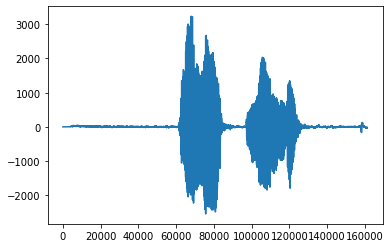

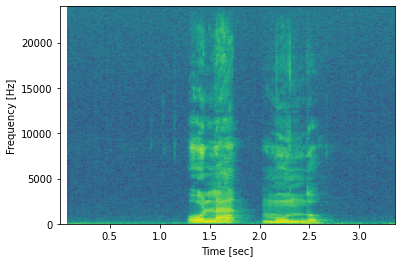

Vector que van a poblar nuestras frecuencias es de tamaño:
513
Número de ventanas:
174
Tenemos la siguiente cantidad de frecuencia
513
Ventana: 31
Ventana: 53
O 1.8536428637592504
Ventana: 71
Ventana: 74
Ventana: 82
Ventana: 83
Ventana: 84
Ventana: 85
Ventana: 86
E 0.8301041784929682
O 1.190163400016788
I 1.8304622283602694
Ventana: 87
Ventana: 88
Ventana: 89
Ventana: 90
Ventana: 91
Ventana: 92
Ventana: 93
Ventana: 94
Ventana: 95
Ventana: 96
O 1.3643316057843888
E 1.609067224520752
I 1.9198483826937498
Ventana: 97
Ventana: 107
Ventana: 109
Ventana: 112
Ventana: 119
Ventana: 120
Ventana: 121
Ventana: 122
Ventana: 123
Ventana: 124
Ventana: 127
Ventana: 136
Ventana: 139
I 1.70754109606733
E 1.7699126821824656
Ventana: 140
E 1.9108546794627532
I 1.925126771860201
Ventana: 153


In [0]:
runASR('Hola_Mundo_M.wav',1024,statisticDBVocals,distance_columns,2)

161280


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


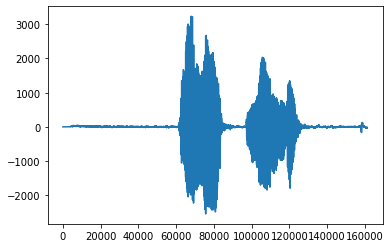

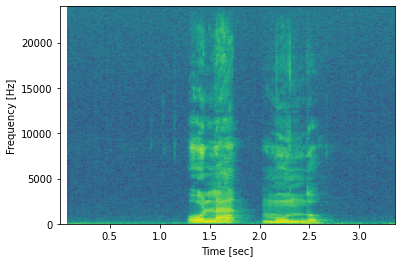

Vector que van a poblar nuestras frecuencias es de tamaño:
513
Número de ventanas:
174
Tenemos la siguiente cantidad de frecuencia
513
Ventana: 31
Ventana: 53
1
FONEMA     A
EDAD       A
GENERO     H
ID        26
Name: 14, dtype: object 0.16141624752974265
Ventana: 71
Ventana: 74
Ventana: 82
Ventana: 83
Ventana: 84
Ventana: 85
Ventana: 86
Ventana: 87
Ventana: 88
1
FONEMA     U
EDAD       A
GENERO     M
ID        10
Name: 119, dtype: object 0.2648544073896801
Ventana: 89
1
FONEMA     U
EDAD       N
GENERO     H
ID        13
Name: 102, dtype: object 0.237162164993363
Ventana: 90
Ventana: 91
Ventana: 92
Ventana: 93
Ventana: 94
Ventana: 95
Ventana: 96
1
FONEMA     U
EDAD       A
GENERO     M
ID        19
Name: 124, dtype: object 0.08107745482369734
Ventana: 97
Ventana: 107
Ventana: 109
Ventana: 112
Ventana: 119
Ventana: 120
Ventana: 121
1
FONEMA     A
EDAD       A
GENERO     M
ID        12
Name: 20, dtype: object 0.13869699133853186
Ventana: 122
Ventana: 123
Ventana: 124
Ventana: 127
Venta

In [0]:
runASR('Hola_Mundo_M.wav',1024,dataVocals,distance_columns,0.3)

161280


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


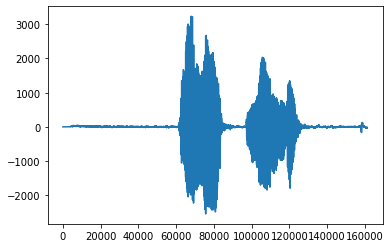

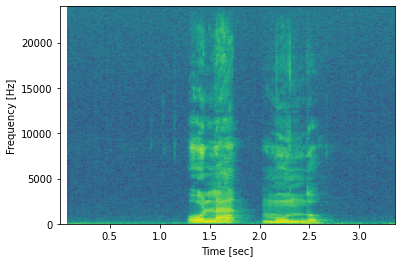

Vector que van a poblar nuestras frecuencias es de tamaño:
513
Número de ventanas:
174
Tenemos la siguiente cantidad de frecuencia
513
Ventana: 31
Ventana: 53
Ventana: 71
Ventana: 74
Ventana: 82
Ventana: 83
Ventana: 84
Ventana: 85
Ventana: 86
Ventana: 87
Ventana: 88
Ventana: 89
Ventana: 90
Ventana: 91
Ventana: 92
Ventana: 93
Ventana: 94
Ventana: 95
Ventana: 96
1
FONEMA     U
EDAD       A
GENERO     M
ID        19
Name: 568, dtype: object 0.056061506123493796
1
FONEMA     J
EDAD       A
GENERO     M
ID        15
Name: 244, dtype: object 0.07637441690378066
1
FONEMA     F
EDAD       A
GENERO     M
ID        19
Name: 171, dtype: object 0.08853338141343978
Ventana: 97
Ventana: 107
Ventana: 109
Ventana: 112
Ventana: 119
Ventana: 120
Ventana: 121
Ventana: 122
Ventana: 123
Ventana: 124
Ventana: 127
Ventana: 136
Ventana: 139
Ventana: 140
1
FONEMA     O
EDAD       A
GENERO     M
ID        22
Name: 420, dtype: object 0.09854308174060221
Ventana: 153


In [0]:
#Ejemplo de ejecucición

runASR('Hola_Mundo_M.wav',1024,data1,distance_columns,0.1)


161280


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


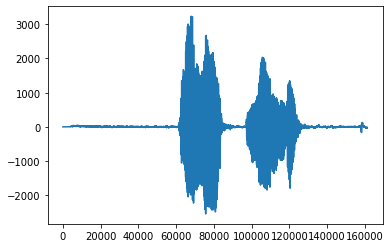

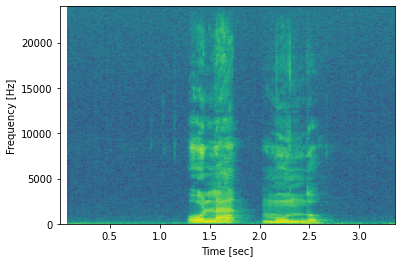

Vector que van a poblar nuestras frecuencias es de tamaño:
513
Número de ventanas:
174
Tenemos la siguiente cantidad de frecuencia
513
Ventana: 31
Ventana: 53
CH 0.4030430487328213
F 0.7659421547824085
Ventana: 71
Ventana: 74
Ventana: 82
Ventana: 83
Ventana: 84
Ventana: 85
Ventana: 86
N 0.42595685122056426
E 0.43170381361991134
P 0.6154881242299128
THETA 0.7267553337931034
KS 0.7717012395696722
O 0.7890415070727178
Ventana: 87
Ventana: 88
Ventana: 89
Ventana: 90
Ventana: 91
D 0.5103541329226401
Ventana: 92
K 0.5493975215641171
B 0.6374959295782497
T 0.7742841428999809
R 0.776964225558175
Ventana: 93
Ventana: 94
D 0.5985444302081784
Ventana: 95
T 0.7457411945238757
Ventana: 96
U 0.4691562774568083
F 0.7268113494960858
KS 0.740810028191096
Ventana: 97
Ventana: 107
Ventana: 109
Ventana: 112
Ventana: 119
Ventana: 120
Ventana: 121
CH 0.6483453295854761
F 0.7440024167497796
Ventana: 122
Ventana: 123
CH 0.7143760701586862
Ventana: 124
Ventana: 127
Ventana: 136
I 0.702874643086171
RR 0.7113058

In [0]:
runASR('Hola_Mundo_M.wav',1024,statisticDB,distance_columns,0.8)

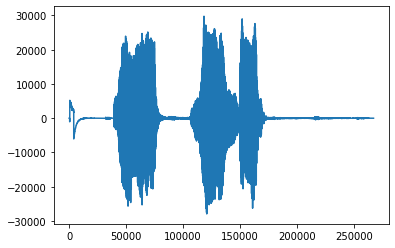

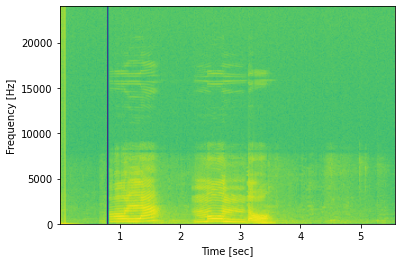

Vector que van a poblar nuestras frecuencias es de tamaño:
513
Número de ventanas:
298
Tenemos la siguiente cantidad de frecuencia
513
Muestra 20
('U_N_M', 0.1719502084034393)
Muestra 21
('Ñ_A_H', 0.08200996895265943)
Muestra 22
('D_P_M', 0.11020243287556417)
Muestra 23

Muestra 24

Muestra 25
('P_A_H', 0.19505327304583422)
Muestra 26
('P_A_H', 0.22977364498336258)
Muestra 27
('A_N_H', 0.23480860696452646)
Muestra 30

Muestra 33

Muestra 37
('Y_P_M', 0.1860591016392668)
Muestra 40

Muestra 41
('G_N_M', 0.10157561061906732)
Muestra 43
('LL_N_H', 0.25741832493491934)
Muestra 44

Muestra 45

Muestra 46

Muestra 47
('R_N_M', 0.1632239467422768)
Muestra 48

Muestra 52

Muestra 54

Muestra 55

Muestra 56

Muestra 60

Muestra 61

Muestra 62

Muestra 63

Muestra 64

Muestra 65
('K_N_M', 0.2755419062557589)
Muestra 67
('K_N_M', 0.23965053796733823)
Muestra 76

Muestra 77

Muestra 78

Muestra 79

Muestra 80
('K_N_M', 0.25351668201108324)
Muestra 81
('U_N_H', 0.2882837560875615)
Muestra 82
('U_N_

In [0]:
runASR('Hola_mundo_1.wav',1024,statisticDB,distance_columns,0.3)

In [0]:
def funcionX():
  global prueba
  prueba=4
funcionX()
prueba

4

In [0]:
prueba

4